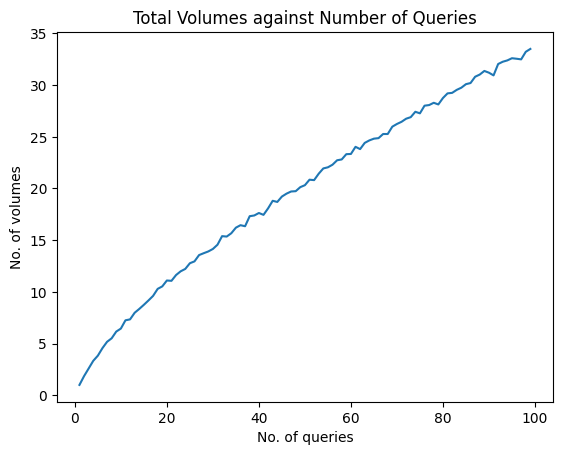

In [2]:
import math
import random
import matplotlib.pyplot as plt

RSEmax = 16

result= []
levels = {}
levels[0]= {(1,RSEmax)}
for i in range(1, int(math.log(RSEmax, 2))+1):
    levels[i] = set()
    for node in levels[i-1]: #levels[0]: (1,8) levels[1]:{...} 
        mid = (node[0] + node[1]) // 2
        levels[i].add((node[0], mid))
        levels[i].add(((node[0]+mid)//2+1, (mid+1+node[1])//2))
        levels[i].add((mid+1, node[1]))

cover = []

EDS = []
for value in levels.values():
   EDS += value

def over_cover(a, b):
  nodes_in_range = []
  min_node = []
  minimum_range = RSEmax
  for node in EDS:
    if node[0] <= a and node[1] >= b:
      nodes_in_range.append(node)
  for node in nodes_in_range:
    if node[1] - node[0] < minimum_range:
      minimum_range = node[1] - node[0]
      min_node.clear()
      min_node.append(node)
  return min_node[0]

def cover_log_query(num_of_qry):
    all_combinations = {(start, end) for start in range(1, RSEmax + 1) for end in range(start, RSEmax + 1)}
    total_vols = 0

    for h in range(100):
        vol_tracker = set()  
        vol_sum = 0
        parent = all_combinations.copy()

        for v in range(num_of_qry):
            if not parent: #if parent is not empty, False, wont break
                break
            
            (start_int, end_int) = random.choice(list(parent))
            parent.remove((start_int, end_int))

            if over_cover(start_int, end_int) not in vol_tracker:
                vol_tracker.add(over_cover(start_int, end_int))
                vol_sum += 1

        total_vols += vol_sum
    
    return total_vols / 100  

x_axis = []
y_axis = []
for v in range(1, 100):
    x_axis.append(v)
    y_axis.append(cover_log_query(v))

plt.plot(x_axis, y_axis)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()
